In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import json
import config

## Wat zijn succesvolle strategieen om positieve mensen op te sporen? 

Doel: verschillende methoden vergelijken zoals:
* Percentage positieven uitslagen algemeen
* Percentage positieve uitslagen via BCO
* Percentage positieve uitslagen via CoronaMelder (met en zonder klachten)
* Eventueel prevalentie
* Eventueel uitslagen BCO Huisgenoten en BCO nauwe contacten

Er zijn verschillende datasets beschikbaar:
1. [GGD App statistics](https://github.com/minvws/nl-covid19-notification-app-statistics)
2. [COVID weekberichten van het RIVM](https://www.rivm.nl/coronavirus-covid-19/actueel/wekelijkse-update-epidemiologische-situatie-covid-19-in-nederland). In tabellen 10 en 12 zijn de resultaten van BCO uitgeplitst.
3. [RIVM uitgevoerde testen](https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/0f3336f5-0f16-462c-9031-bb60adde4af1)

In [5]:
PATH = config.PATH_RIVM

In [6]:
# Eerst de algmene testcijfers van het RIVM inladen.

columns = ['Date_of_statistics', 'Security_region_name', 'Tested_with_result', 'Tested_positive']

algemeen = pd.read_csv(PATH + 'COVID-19_uitgevoerde_testen.csv', 
                    sep=';', 
                    usecols=columns, 
                    parse_dates=['Date_of_statistics'])

# Omzetten naar weeknummers

algemeen['Week_number'] = algemeen['Date_of_statistics'].dt.isocalendar().week

# Columns hernoemen

algemeen = algemeen.rename(columns={'Tested_with_result': 'RIVM_tested_with_result',
                                    'Tested_positive': 'RIVM_tested_positive'})

# Agreggeren naar weeknummer

algemeen = algemeen.groupby('Week_number').sum(['Tested_with_result', 'Tested_positive']).reset_index()

algemeen.head()

,Week_number,RIVM_tested_with_result,RIVM_tested_positive
0,1,323377,41636
1,2,293996,32293
2,3,268376,29417
3,4,208275,23804
4,5,195166,20871


In [4]:
# Vervolgens csv van de CoronaMelder inladen

melder = pd.read_csv('data/nederland/coronamelder_positief.csv')
melder = melder.rename(columns={'Week': 'Week_number'})
melder.head()

,Year,Week_number,Test Requests,Total Test Results,Total Positive,Total %Positive,Asymptomatic Test Results,Asymptomatic Positive,Asymptomatic %Positive,Symptomatic Test Results,Symptomatic Positive,Symptomatic %Positive
0,2020,42,4325,2940,342,11.6%,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,43,5058,4992,705,14.1%,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,44,5064,5043,599,11.9%,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,45,3477,3523,381,10.8%,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,46,2833,2747,375,13.7%,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# BCO csv inladen

bco = pd.read_csv(PATH + 'rivm_bco.csv')

bco.head()

,start_week,nieuwe_meldingen,gevonden_via_bco,gevonden_via_bco_%,contactinventarisatie_uitgevoerd,contactinventarisatie_uitgevoerd_%
0,31-08-2020,4981,873,17.5,4875,97.9
1,07-09-2020,8084,1285,15.9,7912,97.9
2,14-09-2020,13625,1730,12.7,13221,97.0
3,21-09-2020,19077,1837,9.6,18219,95.5
4,28-09-2020,27092,1914,7.1,25413,93.8


In [27]:
contacten = pd.read_csv(PATH + 'rivm_contactonderzoek_nauwe_contacten.csv')

contacten.head()

,start_week,aantal,huisgenoten_positief,huisgenoten_positief_%,overigen_nauwe_contacten_aantal,overige_nauwe_contacten_aantal_positief,overige_nauwe_contacten_aantal_positief_%
0,02-11-2020,7747,1104,14.3,4112,250,6.1
1,09-11-2020,23555,4006,17.0,13113,963,7.3
2,16-11-2020,30943,5183,16.8,16685,1195,7.2
3,23-11-2020,32811,6369,19.4,17794,1453,8.2
4,30-11-2020,34955,8261,23.6,20786,2240,10.8


In [23]:
# Dataframes samenvoegen

tests = melder.merge(algemeen, on='Week_number', how='left')

# Converteer week en jaar naar datums (eerste dag van de week). Dit komt later beter van pas

tests['start_week'] = pd.to_datetime(tests['Week_number'].astype(str) + ' 1' + ' ' + tests['Year'].astype(str) ,
                                format='%U %w %Y').dt.strftime('%d-%m-%Y')
tests.head()

,Year,Week_number,Test Requests,Total Test Results,Total Positive,Total %Positive,Asymptomatic Test Results,Asymptomatic Positive,Asymptomatic %Positive,Symptomatic Test Results,Symptomatic Positive,Symptomatic %Positive,RIVM_tested_with_result,RIVM_tested_positive,start_week
0,2020,42,4325,2940,342,11.6%,NaN,NaN,NaN,NaN,NaN,NaN,311849,47151,19-10-2020
1,2020,43,5058,4992,705,14.1%,NaN,NaN,NaN,NaN,NaN,NaN,322027,59113,26-10-2020
2,2020,44,5064,5043,599,11.9%,NaN,NaN,NaN,NaN,NaN,NaN,298900,49481,02-11-2020
3,2020,45,3477,3523,381,10.8%,NaN,NaN,NaN,NaN,NaN,NaN,247435,35881,09-11-2020
4,2020,46,2833,2747,375,13.7%,NaN,NaN,NaN,NaN,NaN,NaN,228047,31485,16-11-2020


In [29]:
df1 = tests.merge(bco, on='start_week', how='left')

In [31]:
df1.head()

,Year,Week_number,Test Requests,Total Test Results,Total Positive,Total %Positive,Asymptomatic Test Results,Asymptomatic Positive,Asymptomatic %Positive,Symptomatic Test Results,Symptomatic Positive,Symptomatic %Positive,RIVM_tested_with_result,RIVM_tested_positive,start_week,nieuwe_meldingen,gevonden_via_bco,gevonden_via_bco_%,contactinventarisatie_uitgevoerd,contactinventarisatie_uitgevoerd_%
0,2020,42,4325,2940,342,11.6%,NaN,NaN,NaN,NaN,NaN,NaN,311849,47151,19-10-2020,66516,3832,5.8,59280,89.1
1,2020,43,5058,4992,705,14.1%,NaN,NaN,NaN,NaN,NaN,NaN,322027,59113,26-10-2020,63220,6999,11.1,54441,86.1
2,2020,44,5064,5043,599,11.9%,NaN,NaN,NaN,NaN,NaN,NaN,298900,49481,02-11-2020,44316,6794,15.3,39653,89.5
3,2020,45,3477,3523,381,10.8%,NaN,NaN,NaN,NaN,NaN,NaN,247435,35881,09-11-2020,37672,7270,19.3,34576,91.8
4,2020,46,2833,2747,375,13.7%,NaN,NaN,NaN,NaN,NaN,NaN,228047,31485,16-11-2020,36818,8078,21.9,33852,91.9


In [45]:
df = df1.merge(contacten, on='start_week', how='left')

In [34]:
df.columns

Index(['Year', 'Week_number', 'Test Requests', 'Total Test Results',
       'Total Positive', 'Total %Positive', 'Asymptomatic Test Results',
       'Asymptomatic Positive', 'Asymptomatic %Positive',
       'Symptomatic Test Results', 'Symptomatic Positive',
       'Symptomatic %Positive', 'RIVM_tested_with_result',
       'RIVM_tested_positive', 'start_week', 'nieuwe_meldingen',
       'gevonden_via_bco', 'gevonden_via_bco_%',
       'contactinventarisatie_uitgevoerd',
       'contactinventarisatie_uitgevoerd_%', 'aantal', 'huisgenoten_positief',
       'huisgenoten_positief_%', 'overigen_nauwe_contacten_aantal',
       'overige_nauwe_contacten_aantal_positief',
       'overige_nauwe_contacten_aantal_positief_%'],
      dtype='object')

In [46]:
df = df.rename(columns={'Test Requests': 'CM_testaanvragen',
                        'Total Test Results': 'CM_aantal_testresultaten',
                        'Total Positive': 'CM_positieve_testen',
                        'Total %Positive': 'CM_percentage_positieve testen',
                        'Asymptomatic Test Results': 'CM_asymp_testresultaten',
                        'Asymptomatic Positive': 'CM_asymp_positieve_testen',
                        'Asymptomatic %Positive': 'CM_asymp_percentage_positieve_testen',
                        'Symptomatic Test Results': 'CM_symp_testresultaten',
                        'Symptomatic Positive': 'CM_symp_positieve_testen',
                        'Symptomatic %Positive': 'CM_symp_percentage_positieve_testen',
                        'RIVM_tested_with_result': 'RIVM_testresultaten',
                        'RIVM_tested_positive': 'RIVM_positieve_testen',
                        'start_week': 'datum',
                        'nieuwe_meldingen': 'RIVM_nieuwe_meldingen',
                        'gevonden_via_bco': 'RIVM_gevonden_via_bco',
                        'gevonden_via_bco_%': 'RIVM_percentage_gevonden_via_bco',
                        'aantal': 'RIVM_nauwe_contacten_opgevolgd',
                        'huisgenoten_positief': 'RIVM_huisgenoten_positief',
                        'huisgenoten_positief_%': 'RIVM_percentage_huisgenoten_positief',
                        'overigen_nauwe_contacten_aantal': 'RIVM_andere_nauwe_contacten',
                        'overige_nauwe_contacten_aantal_positief': 'RIVM_andere_nauwe_contacten_positief',
                        'overige_nauwe_contacten_aantal_positief_%': 'RIVM_percentage_andere_nauwe_contacten_positief'})

df = df[['datum',
         'RIVM_testresultaten',
         'RIVM_positieve_testen',
         'RIVM_nieuwe_meldingen',
         'RIVM_gevonden_via_bco',
         'RIVM_percentage_gevonden_via_bco',
         'RIVM_nauwe_contacten_opgevolgd',
         'RIVM_huisgenoten_positief',
         'RIVM_percentage_huisgenoten_positief',
         'RIVM_andere_nauwe_contacten',
         'RIVM_andere_nauwe_contacten_positief',
         'RIVM_percentage_andere_nauwe_contacten_positief',
         'CM_testaanvragen',
         'CM_aantal_testresultaten',
        'CM_positieve_testen',
        'CM_percentage_positieve testen',
        'CM_asymp_testresultaten',
        'CM_asymp_positieve_testen',
        'CM_asymp_percentage_positieve_testen',
        'CM_symp_testresultaten',
        'CM_symp_positieve_testen',
        'CM_symp_percentage_positieve_testen']]
               
    

In [47]:
df.columns

Index(['datum', 'RIVM_testresultaten', 'RIVM_positieve_testen',
       'RIVM_nieuwe_meldingen', 'RIVM_gevonden_via_bco',
       'RIVM_percentage_gevonden_via_bco', 'RIVM_nauwe_contacten_opgevolgd',
       'RIVM_huisgenoten_positief', 'RIVM_percentage_huisgenoten_positief',
       'RIVM_andere_nauwe_contacten', 'RIVM_andere_nauwe_contacten_positief',
       'RIVM_percentage_andere_nauwe_contacten_positief', 'CM_testaanvragen',
       'CM_aantal_testresultaten', 'CM_positieve_testen',
       'CM_percentage_positieve testen', 'CM_asymp_testresultaten',
       'CM_asymp_positieve_testen', 'CM_asymp_percentage_positieve_testen',
       'CM_symp_testresultaten', 'CM_symp_positieve_testen',
       'CM_symp_percentage_positieve_testen'],
      dtype='object')

In [48]:
df['CM_percentage_positieve testen'] = df['CM_percentage_positieve testen'].str.replace('%', '').astype(float)
df['CM_asymp_percentage_positieve_testen'] = df['CM_asymp_percentage_positieve_testen'].str.replace('%', '').astype(float)
df['CM_symp_percentage_positieve_testen'] = df['CM_symp_percentage_positieve_testen'].str.replace('%', '').astype(float)

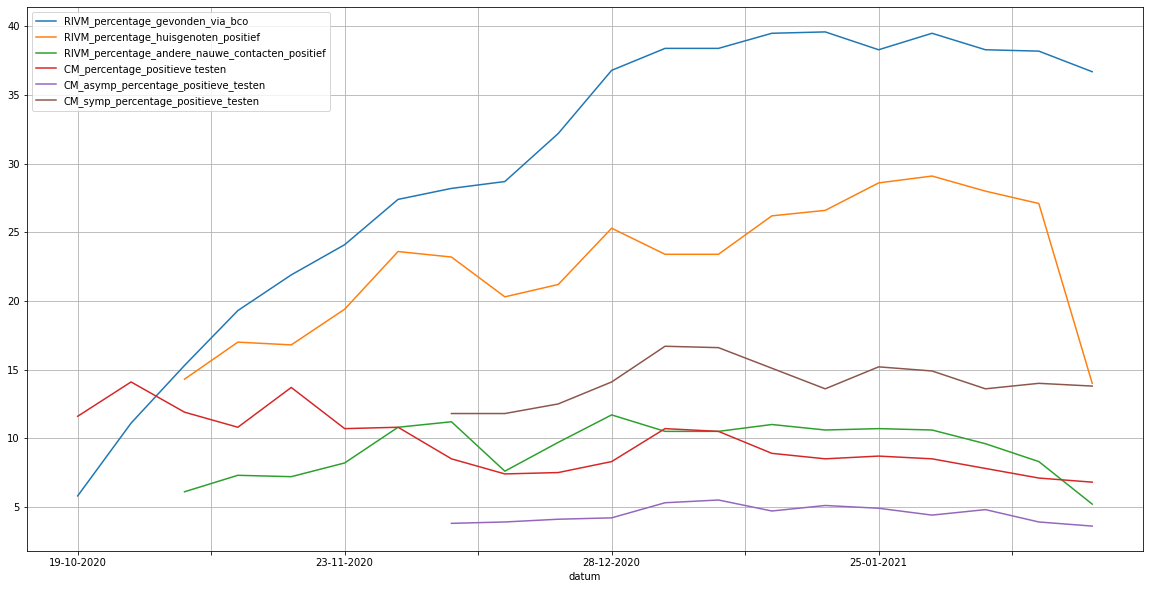

In [52]:
df.plot(x='datum', y=['RIVM_percentage_gevonden_via_bco',
                    'RIVM_percentage_huisgenoten_positief',
                    'RIVM_percentage_andere_nauwe_contacten_positief',
                    'CM_percentage_positieve testen',
                    'CM_asymp_percentage_positieve_testen',
                    'CM_symp_percentage_positieve_testen'], figsize=(20,10),)

plt.grid(True)

In [ ]:
# Enkele nieuwe kolommen berekenen

df['Tested_postive_after_warning'] = df['Total Positive'] / df['Tested_with_result'] * 100
df['Tested_positive_all'] = df['Tested_positive'] / df['Tested_with_result'] *100
df['Tested_positive_without_symptoms'] = df['Asymptomatic Positive'] / df['Tested_with_result'] * 100
df['Tested_positive_without_symptoms_as_perc_of_positives '] = df['Asymptomatic Positive'] / df['Tested_positive'] * 100
df['Tested_positive_with_symptoms'] = df['Symptomatic Positive'] / df['Tested_with_result'] * 100
df['Tested_positive_with_symptoms_as_perc_of_positives'] =  df['Symptomatic Positive'] / df['Tested_positive'] *100